In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as img

In [17]:
resampled_images_path = r"D:\Marcus\ESO_DL_DATA\ESO_DL_DS_resampled\LRCP_ESO001"
npy_segmentations_path = r"D:\Marcus\ESO_DL_DATA\ESO_segmentations_resampled\LRCP_ESO001"

In [18]:
CT_path = os.path.join(resampled_images_path, "LRCP_ESO001_CT.npy")

npy_array = np.load(CT_path)
print(f"Shape of the npy array: {npy_array.shape}")
print(f"Data type of the npy array: {npy_array.dtype}")

Shape of the npy array: (299, 512, 512)
Data type of the npy array: int32


In [20]:
eso_path = os.path.join(npy_segmentations_path, "LRCP_ESO001_esophagus.npy")
eso_array = np.load(eso_path)
t5_path = os.path.join(npy_segmentations_path, "LRCP_ESO001_vertebrae_T5.npy")
t5_array = np.load(t5_path)

In [78]:
new_eso = np.zeros_like(npy_array)
new_t5 = np.zeros_like(npy_array)

for i in range(npy_array.shape[0]):
    new_eso[i] = img.rotate(eso_array[i], 5, reshape=False, order=2)
    new_t5[i] = img.rotate(t5_array[i], 45, reshape=False, order=2)


In [79]:
new_image = np.zeros_like(npy_array)

for slice_number in range (npy_array.shape[0]):
    new_image[slice_number] = img.rotate(npy_array[slice_number], 5, reshape=False, order=2)

In [7]:
rotated_image = img.rotate(npy_array[120, :, :], 20, reshape=False, order=2)

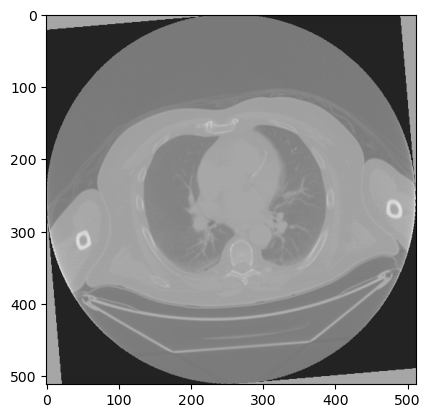

In [80]:
plt.imshow(new_image[175, :, :], cmap='gray')

In [37]:
location_arrays =np.where(new_eso==1)

In [43]:
front, back, right, left = np.min(location_arrays[1]), np.max(location_arrays[1]), np.min(location_arrays[2]), np.max(location_arrays[2])
print(f"Right: {right}, Left: {left}, Front: {front}, Back: {back}")

Right: 251, Left: 302, Front: 234, Back: 289


In [47]:
middle = ((back-front)//2 + front, (left-right)//2 + right)
print(f"Middle: {middle}")

Middle: (261, 276)


In [68]:
t5_location = np.where(new_t5==1)
upper_t5 = np.max(t5_location[0])

Crop shape: (64, 128, 128)


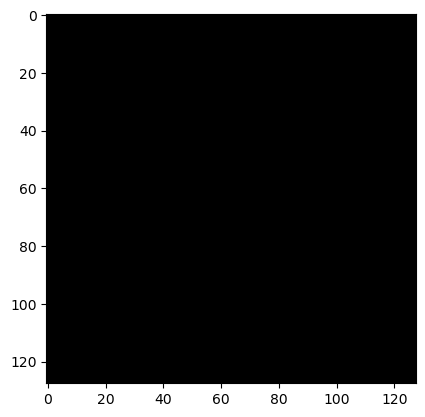

In [75]:
crop_eso = new_eso[upper_t5-64:upper_t5, middle[0]-64:middle[0]+64, middle[1]-64:middle[1]+64]

print(f"Crop shape: {crop_eso.shape}")
plt.imshow(crop_eso[14, :, :], cmap='gray')

In [9]:
print(f"Min value in the npy array: {np.min(npy_array)}")
print(f"Max value in the npy array: {np.max(npy_array)}")
print(f"median value in the npy array: {np.median(npy_array)}")

Min value in the npy array: -3024
Max value in the npy array: 3071
median value in the npy array: -988.0


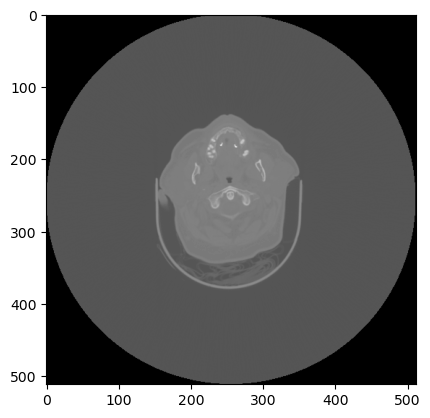

In [36]:
plt.imshow(npy_array[250, :,:], cmap='gray')

In [14]:
PET_path = os.path.join(resampled_images_path, "LRCP_ESO001_PET_SUVbw.npy")
npy_array = np.load(PET_path)
print(f"Shape of the npy array: {npy_array.shape}")
print(f"Data type of the npy array: {npy_array.dtype}")

Shape of the npy array: (299, 512, 512)
Data type of the npy array: float64
